# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Eddie Stokes Homework Weatherpy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_data = []
counter = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    

    print(f"City {counter}: {city}")
    print("---------------------")
    
    query_url = f"{url}appid={api_key}&q={city}"
    response = requests.get(query_url).json()
    counter = counter + 1
    
    try:
        temp_max = (response['main']['temp_max'])
        lat = (response['coord']['lat'])
        lon = (response['coord']['lon'])
        clouds = (response['clouds']['all'])
        date = (response['dt'])
        humidity = (response['main']['humidity'])
        wind = (response['wind']['speed'])
        name = (response['name'])
        
        #save data in a dictionary
        weather_data = {"Max Temp" : temp_max,
                        "Lat" : lat,
                        "Lon" : lon,
                        "Cloudiness" : clouds,
                        "Date" : date,
                        "Humidity" : humidity,
                        "Wind Speed" : wind,
                        "City" : name}
    
        city_data.append(weather_data)
        
    except KeyError:
        print("Skipping: City Not Found")

response

City 1: cockburn town
---------------------
City 2: jamestown
---------------------
City 3: busselton
---------------------
City 4: mys shmidta
---------------------
Skipping: City Not Found
City 5: okitipupa
---------------------
City 6: castro
---------------------
City 7: middelburg
---------------------
City 8: rikitea
---------------------
City 9: puerto ayora
---------------------
City 10: qixingtai
---------------------
City 11: mar del plata
---------------------
City 12: cape town
---------------------
City 13: bengkulu
---------------------
Skipping: City Not Found
City 14: pangnirtung
---------------------
City 15: port lincoln
---------------------
City 16: bluff
---------------------
City 17: vaini
---------------------
City 18: skibbereen
---------------------
City 19: hermanus
---------------------
City 20: thompson
---------------------
City 21: guerrero negro
---------------------
City 22: nemuro
---------------------
City 23: avarua
---------------------
City 24: depu

City 184: dikson
---------------------
City 185: golden
---------------------
City 186: rivadavia
---------------------
City 187: skagastrond
---------------------
Skipping: City Not Found
City 188: meulaboh
---------------------
City 189: baracoa
---------------------
City 190: bandarbeyla
---------------------
City 191: yerofey pavlovich
---------------------
City 192: maceio
---------------------
City 193: livingston
---------------------
City 194: naze
---------------------
City 195: richards bay
---------------------
City 196: kodiak
---------------------
City 197: sumkino
---------------------
City 198: ust-tsilma
---------------------
City 199: constitucion
---------------------
City 200: cidreira
---------------------
City 201: grand centre
---------------------
Skipping: City Not Found
City 202: beloha
---------------------
City 203: saskylakh
---------------------
City 204: barentsburg
---------------------
Skipping: City Not Found
City 205: severo-kurilsk
-------------------

City 374: imeni poliny osipenko
---------------------
City 375: puerto escondido
---------------------
City 376: ust-koksa
---------------------
City 377: kuala terengganu
---------------------
City 378: kovdor
---------------------
City 379: adrar
---------------------
City 380: beian
---------------------
City 381: vangaindrano
---------------------
City 382: shinshiro
---------------------
City 383: erenhot
---------------------
City 384: margate
---------------------
City 385: kamenka
---------------------
City 386: kenai
---------------------
City 387: gigmoto
---------------------
City 388: kautokeino
---------------------
City 389: sobradinho
---------------------
City 390: leningradskiy
---------------------
City 391: saint anthony
---------------------
City 392: ostrovnoy
---------------------
City 393: umm lajj
---------------------
City 394: tual
---------------------
City 395: okha
---------------------
City 396: teguise
---------------------
City 397: quiindy
-------------

City 562: palana
---------------------
City 563: santiago del estero
---------------------
City 564: blythe
---------------------
City 565: puerto del rosario
---------------------
City 566: malini
---------------------
City 567: tomatlan
---------------------
City 568: fairbanks
---------------------
City 569: makakilo city
---------------------
City 570: aklavik
---------------------
City 571: khanpur
---------------------
City 572: raytown
---------------------
City 573: spas-klepiki
---------------------
City 574: raudeberg
---------------------
City 575: motygino
---------------------
City 576: do rud
---------------------
Skipping: City Not Found
City 577: khalkhal
---------------------
City 578: zheshart
---------------------
City 579: shahrud
---------------------
City 580: keti bandar
---------------------
City 581: ternate
---------------------
City 582: the valley
---------------------
City 583: kodinar
---------------------
City 584: hailar
---------------------
City 585: p

{'coord': {'lon': 77.24, 'lat': 38.42},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 294.82,
  'pressure': 1026,
  'humidity': 56,
  'temp_min': 294.82,
  'temp_max': 294.82},
 'wind': {'speed': 0.45, 'deg': 162, 'gust': 2.24},
 'clouds': {'all': 8},
 'dt': 1554658271,
 'sys': {'type': 3,
  'id': 2003783,
  'message': 0.0033,
  'country': 'CN',
  'sunrise': 1554683168,
  'sunset': 1554729573},
 'id': 1280037,
 'name': 'Shache',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create new Dataframe with the extracted data
new_df = pd.DataFrame(city_data)
new_df = new_df.rename(columns={"Max Temp": "Max_Temp"})
new_df = new_df.rename(columns={"Wind Speed": "Wind_Speed"})
new_df.head()

,City,Cloudiness,Date,Humidity,Lat,Lon,Max_Temp,Wind_Speed
0,Cockburn Town,0,1554656106,96,21.46,-71.14,299.434,7.51
1,Jamestown,0,1554656203,81,-33.21,138.60,279.034,1.11
2,Busselton,0,1554656111,52,-33.64,115.35,285.370,5.31
3,Okitipupa,8,1554656204,64,6.50,4.78,303.334,2.36
4,Castro,75,1554652800,82,-42.48,-73.76,290.150,5.70


In [9]:
new_df.to_csv('weatherpydata.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

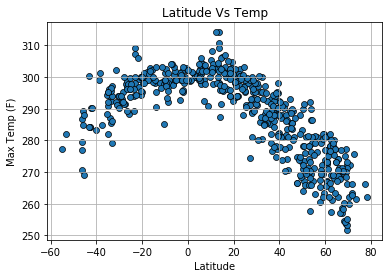

In [18]:
#plot the lat vs temp data
plt.scatter(new_df.Lat,
            new_df.Max_Temp,
            edgecolors="black", alpha=1, linewidths=.7, marker="o")

plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Latitude Vs Temp")
plt.grid()

# plt.show()
plt.savefig("latVStemp.png")


#### Latitude vs. Humidity Plot

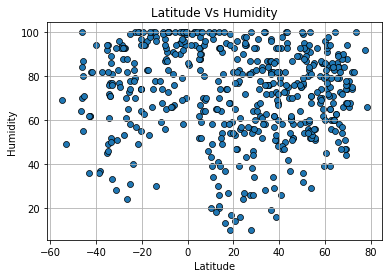

In [11]:
#plot the lat vs humidity data
plt.scatter(new_df.Lat,
            new_df.Humidity,
            edgecolors="black", alpha=1, linewidths=.7, marker="o")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude Vs Humidity")
plt.grid()
# plt.show()

plt.savefig("latVShumidity.png")

#### Latitude vs. Cloudiness Plot

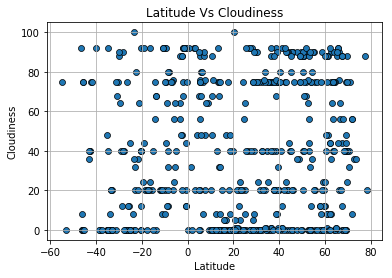

In [12]:
#plot the lat vs cloudiness data
plt.scatter(new_df.Lat,
            new_df.Cloudiness,
            edgecolors="black", alpha=1, linewidths=.7, marker="o")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude Vs Cloudiness")
plt.grid()
# plt.show()
plt.savefig("latVScloudiness.png")


#### Latitude vs. Wind Speed Plot

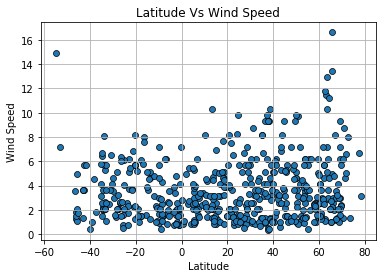

In [13]:
#plot the lat vs speed data
plt.scatter(new_df.Lat,
            new_df.Wind_Speed,
            edgecolors="black", alpha=1, linewidths=.7, marker="o")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude Vs Wind Speed")
plt.grid()
# plt.show()
plt.savefig("latVSwindspeed.png")


Observations:
1. proximity to the equator does not seem to have a significant effect on cloudiness
2. overall, max temperature of cities tend to be lower when they're further from the equator
3. there looks to be little to no correlation between a city's cloudiness and it's proximity to the equator